# 1.Setup

Após a execução do script make_dataset.py, a base de train_processed foi criada para análises.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# paleta de cores do seaborn usada nesse notebook
sns.set_palette('deep')

# cor das tabelas de cores usadas nesse notebook
cor_das_tabelas = 'Blues'

# 2.Carregamento da Base

In [3]:
df_casas = pd.read_csv(r'../data/processed/processed_casas.csv')
df_casas.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NotAvailable,Reg,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NotAvailable,Reg,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NotAvailable,IR1,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NotAvailable,IR1,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NotAvailable,IR1,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,12,2008,WD,Normal,250000


In [4]:
# dimensoes
df_casas.shape

(1459, 81)

In [5]:
# vou checar se os nulos foram realmente tratados corretamente
df_casas.isnull().sum()[df_casas.isnull().sum()>0]

Series([], dtype: int64)

Como temos muitas variáveis, irei separar o EDA em partes.

# 3.EDA

## 3.1.Variáveis Numéricas

In [6]:
# separando variáveis numéricas e categóricas
num_cols = list(df_casas.select_dtypes(['float', 'int']).drop(columns='Id').columns)
cat_cols = list(df_casas.select_dtypes('object').columns)


# criando o df de variaveis numericas
df_casas_num = df_casas[num_cols]

In [7]:
display(df_casas_num.shape)
df_casas_num.head()

(1459, 37)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


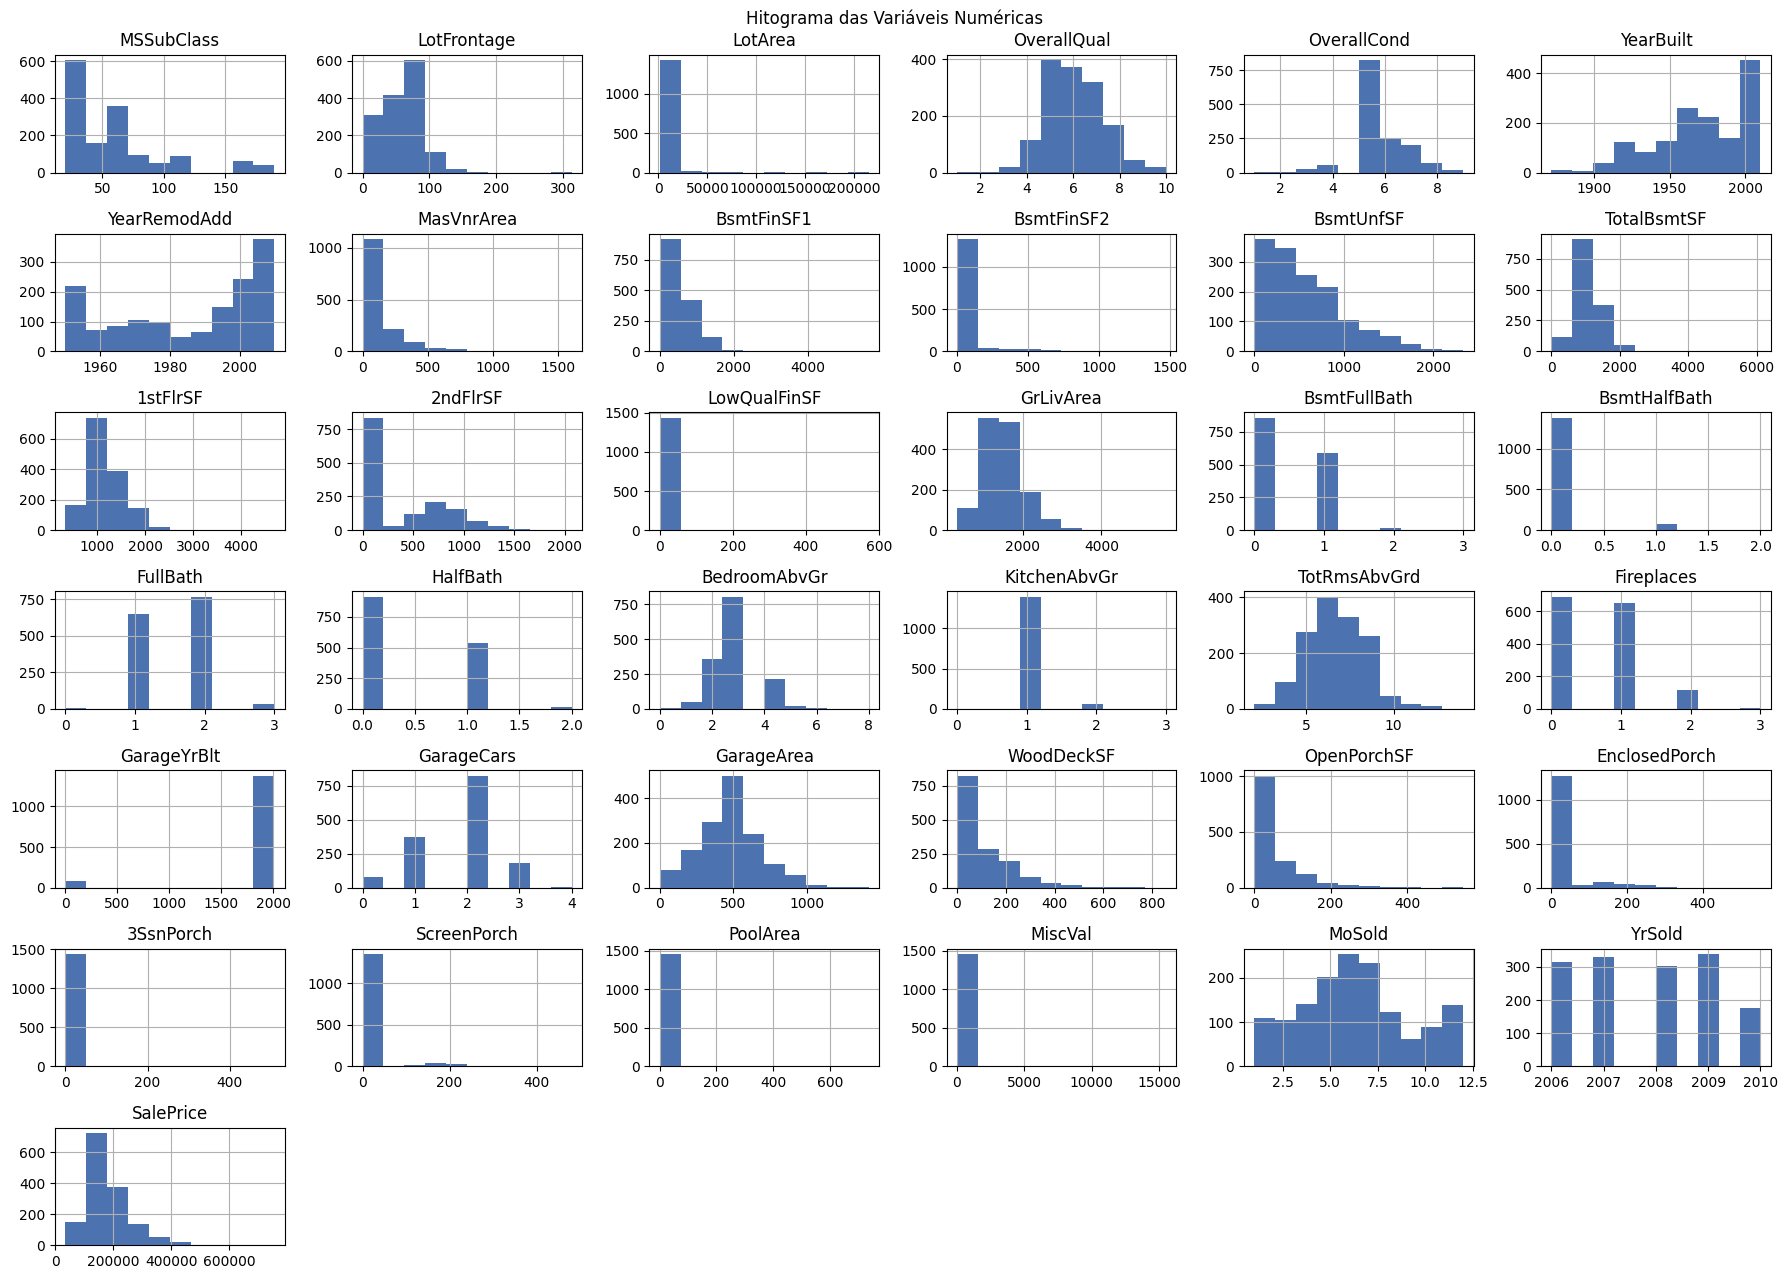

In [8]:
# observando a distribuição das variáveis numéricas
df_casas_num.hist(figsize=(18,13))
plt.gcf().suptitle('Hitograma das Variáveis Numéricas')
plt.tight_layout()
plt.show()

Algumas variáveis parecem seguir uma distribuição normal, inclusive nossa variável target **SalePrice**.

Essa pode ser uma informação valiosa dependendo do algoritmo que será adotado.

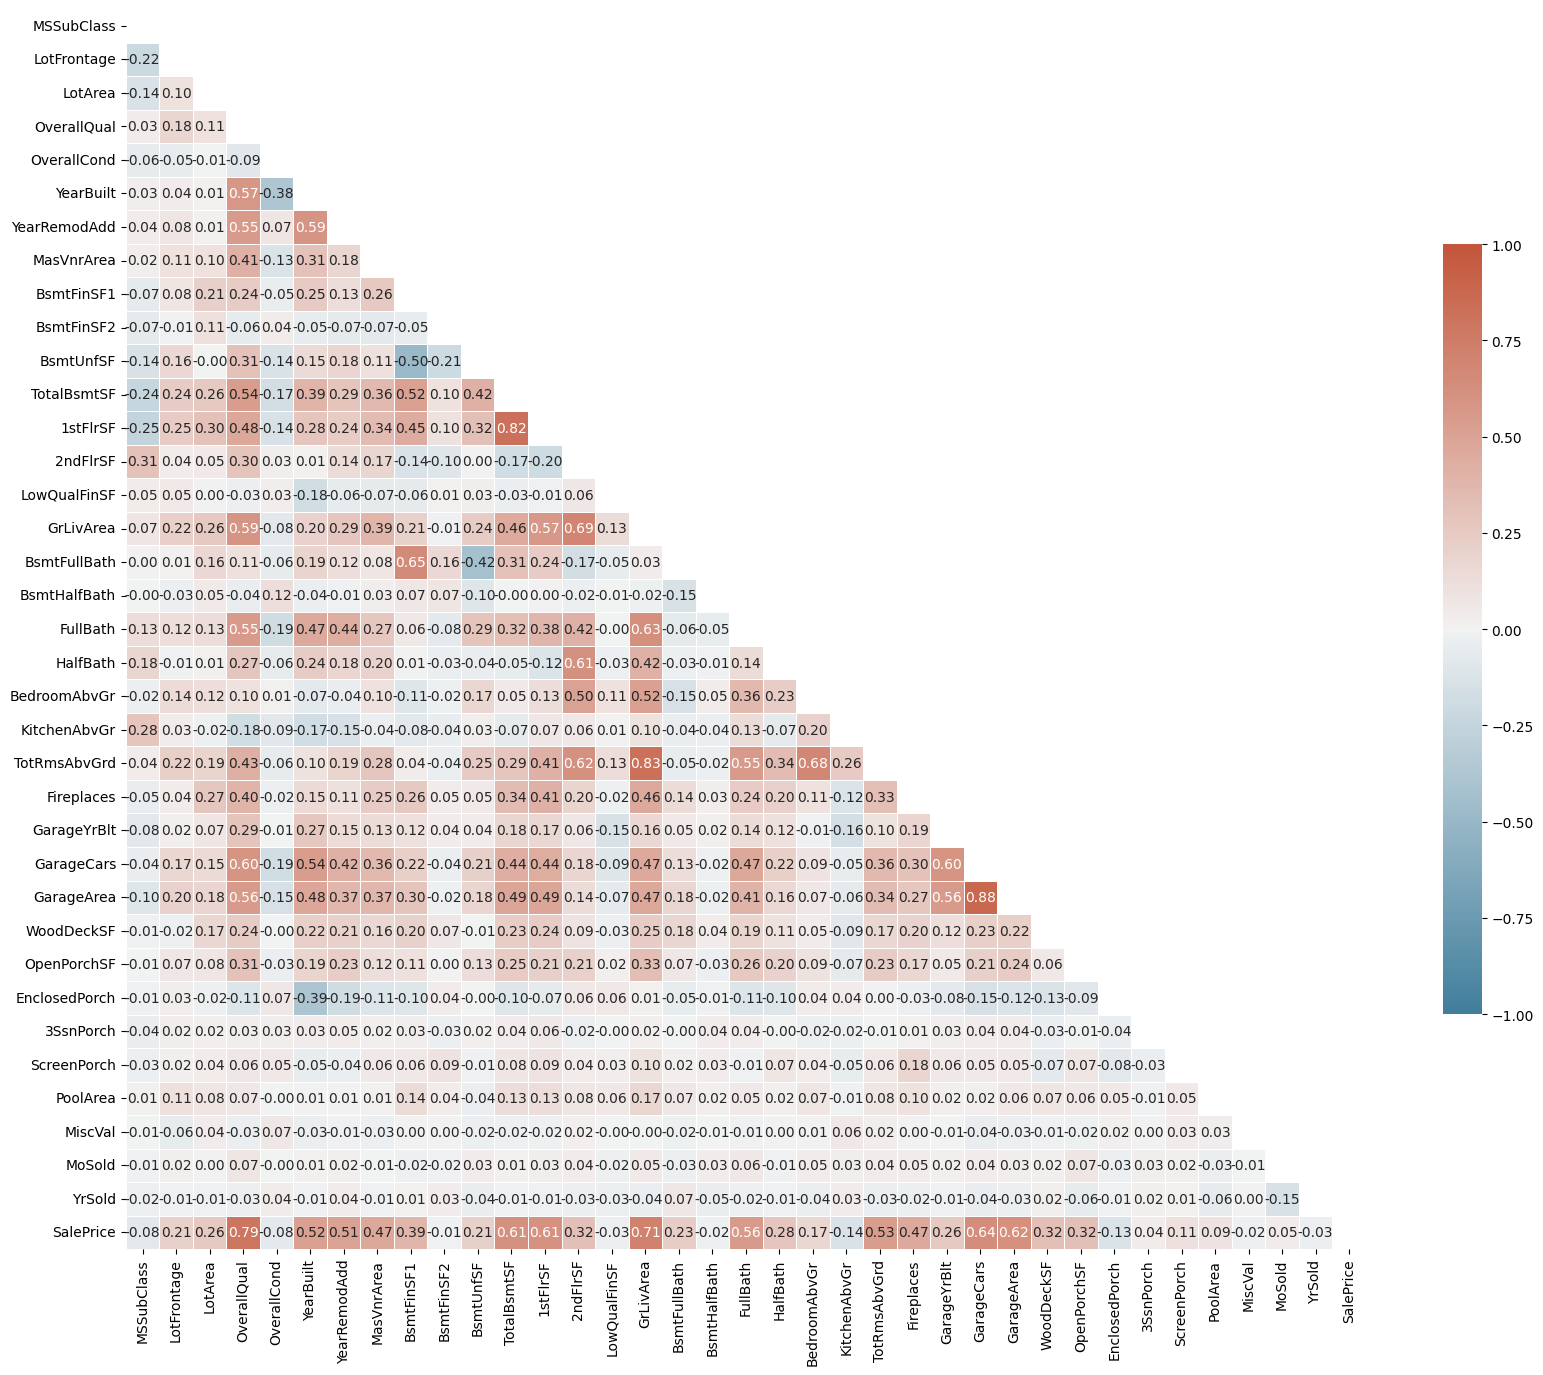

In [9]:
# vou checar logo a correlação das variáveis
# esse grafico e basicamente um heatmap, porem, ele nao mostra as correlacoes entre as proprias variaveis e nem as repetidas
# e uma forma resumida do heatmap 
# correlacao
corr = df_casas_num.corr()

# plotagem
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
# link da doc do gráfico
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

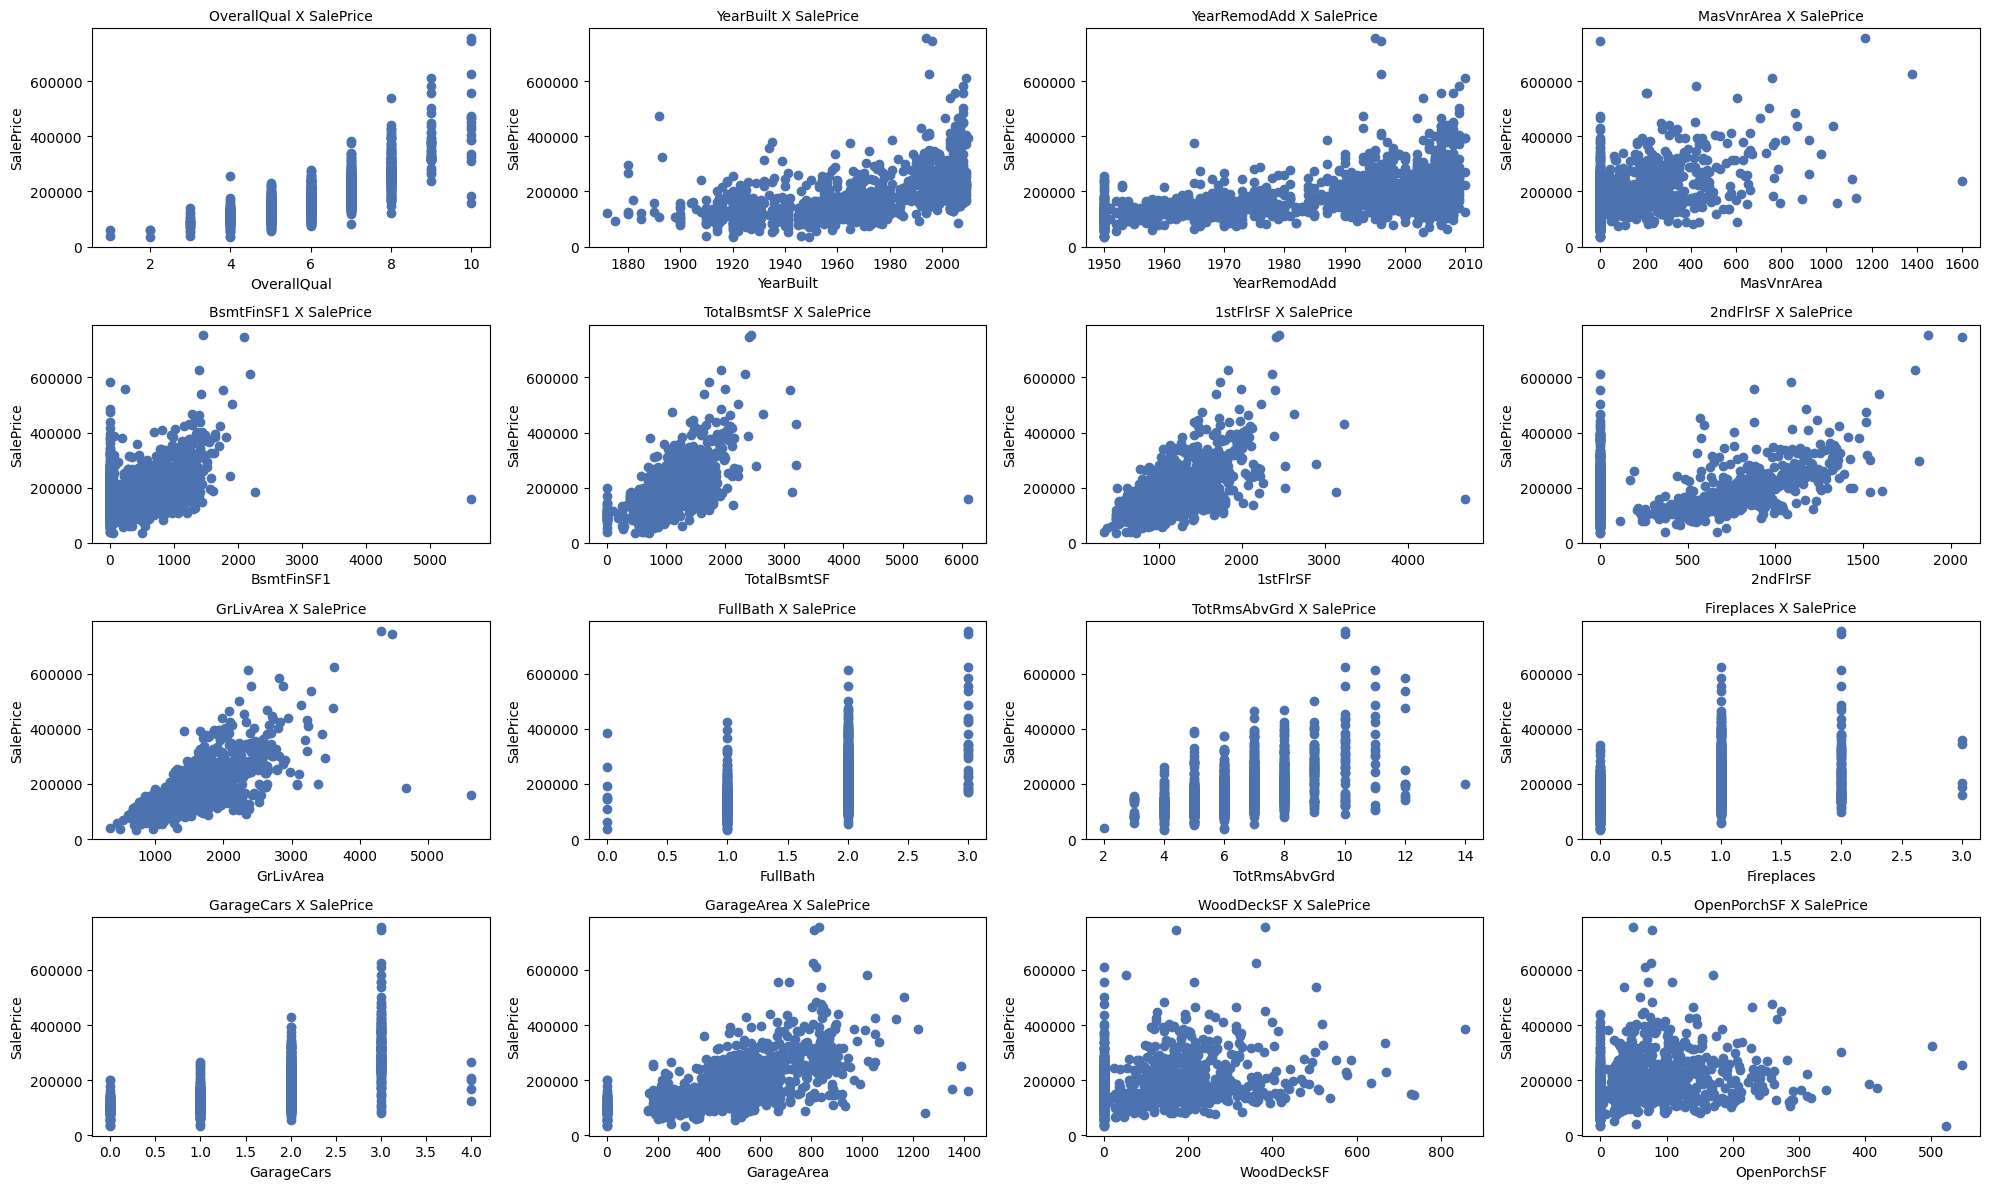

In [10]:
# checando relacionamento das variáveis mais "fortes" em relação a variável target
most_corr_cols = list(corr.loc[abs(corr['SalePrice'])>=0.3, ['SalePrice']].index[:-1]) # tirando saleprice

# plotagem de scatterplot para variáveis numéricas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 12))



# Loop para plotar cada scatterplot nos subplots
for i, ax in enumerate(axes.flat):
    if i < len(most_corr_cols):
        
        x = df_casas_num[most_corr_cols[i]]
        y = df_casas_num['SalePrice']
        ax.scatter(x=x, y=y)

        ax.set_title(f'{most_corr_cols[i]} X SalePrice', fontsize=10)  # Adiciona o título com a relação entre as colunas
        ax.set_xlabel(f'{most_corr_cols[i]}')
        ax.set_ylabel('SalePrice')
        

plt.tight_layout()
plt.show()

A correlação positiva das variáveis GrLivArea, TotalBsmtSF, 1stFlrSFe e 2stFlrSF com SalePrice é muito clara.

In [11]:
# describe da base
df_casas_num[most_corr_cols+['SalePrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
YearBuilt,1459.0,1971.244003,30.199555,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
TotalBsmtSF,1459.0,1057.891021,438.500975,0.0,796.0,992.0,1298.5,6110.0
1stFlrSF,1459.0,1162.906785,386.572089,334.0,882.0,1088.0,1391.5,4692.0
2ndFlrSF,1459.0,346.791638,436.610637,0.0,0.0,0.0,728.0,2065.0
GrLivArea,1459.0,1515.546950,525.650927,334.0,1129.0,1464.0,1777.5,5642.0
FullBath,1459.0,1.564770,0.550987,0.0,1.0,2.0,2.0,3.0


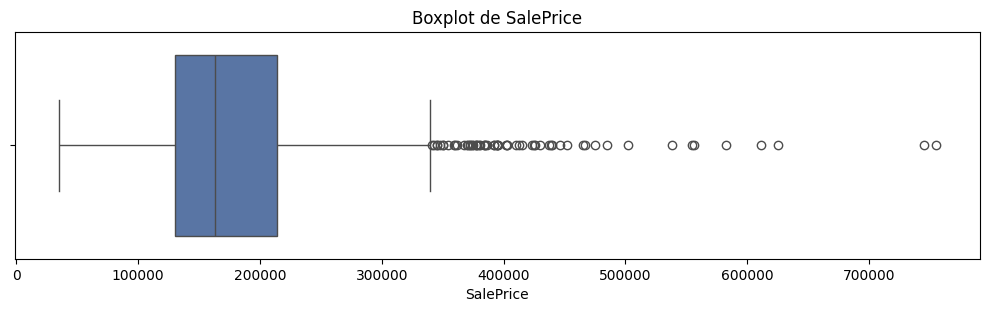

In [12]:
# boxplot da variável alvo
plt.figure(figsize=(10,3))
sns.boxplot(data=df_casas_num, x='SalePrice')
plt.tight_layout()
plt.title("Boxplot de SalePrice")
plt.show()

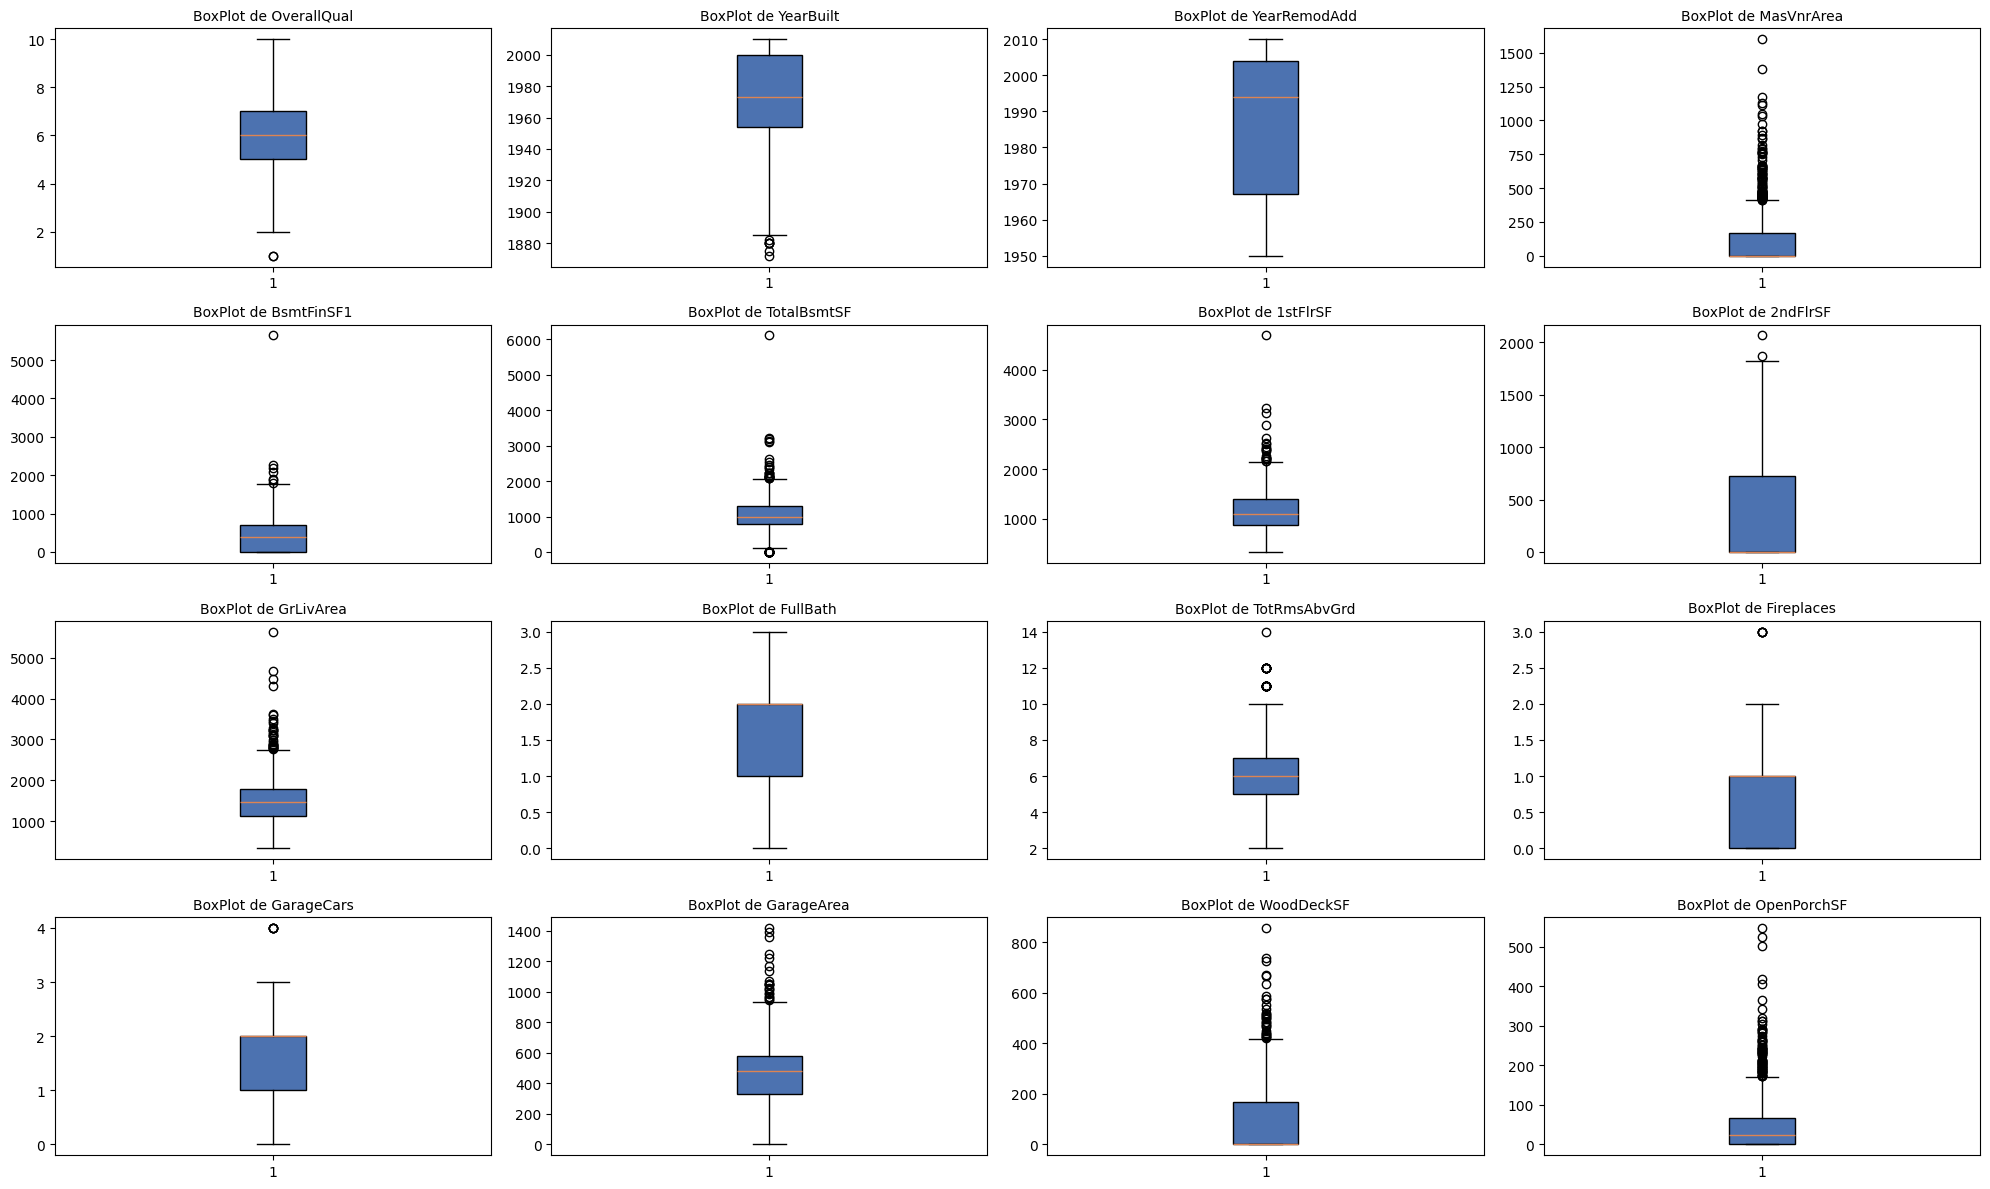

In [13]:
# plotagem de scatterplot para variáveis numéricas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 12))



# Loop para plotar cada scatterplot nos subplots
for i, ax in enumerate(axes.flat):
    if i < len(most_corr_cols):
        

        ax.boxplot(data=df_casas_num, x=most_corr_cols[i], patch_artist=True)

        ax.set_title(f'BoxPlot de {most_corr_cols[i]}', fontsize=10)  # Adiciona o título com a relação entre as colunas
        #ax.set_xlabel(f'{most_corr_cols[i]}')
        

plt.tight_layout()
plt.show()

## 3.2.Variáveis Categóricas

In [14]:
# df das variáveis categóricas
df_casas_cat = df_casas[cat_cols + ['SalePrice']]
df_casas_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NotAvailable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NotAvailable,NotAvailable,NotAvailable,WD,Normal,208500
1,RL,Pave,NotAvailable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NotAvailable,NotAvailable,NotAvailable,WD,Normal,181500
2,RL,Pave,NotAvailable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NotAvailable,NotAvailable,NotAvailable,WD,Normal,223500
3,RL,Pave,NotAvailable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NotAvailable,NotAvailable,NotAvailable,WD,Abnorml,140000
4,RL,Pave,NotAvailable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NotAvailable,NotAvailable,NotAvailable,WD,Normal,250000


In [15]:
# testando a correlação das variáveis categóricas
resultado_pvalue = {}
for col in cat_cols:
    categorias = [dados for grupo, dados in df_casas_cat.groupby(col)['SalePrice']]
    anova_result = f_oneway(*categorias)
    resultado_pvalue[col] = anova_result.pvalue

resultado_pvalue_df = pd.DataFrame([resultado_pvalue]).T.reset_index()
resultado_pvalue_df.columns = ['Variaveis', 'pvalue']


In [16]:
# Apenas 3 variáveis não passaram no teste de correção
resultado_pvalue_df.loc[resultado_pvalue_df['pvalue']>.05].sort_values('pvalue', ascending=True)


,Variaveis,pvalue
1,Street,0.117104
7,LandSlope,0.141861
5,Utilities,0.584762


In [17]:
# Variáveis que passaram
resultado_pvalue_df.loc[resultado_pvalue_df['pvalue']<=.05].sort_values('pvalue', ascending=True)

,Variaveis,pvalue
8,Neighborhood,8.807309e-226
18,ExterQual,1.861836e-204
21,BsmtQual,9.417462e-196
30,KitchenQual,3.121752e-192
34,GarageFinish,4.159619e-115
32,FireplaceQu,3.319708e-107
20,Foundation,4.785251e-91
33,GarageType,3.204858e-87
24,BsmtFinType1,2.717863e-71
27,HeatingQC,2.980579e-67


Pretendo avaliar as relações das 5 variáveis que mais impactam no preço do imóvei. Para isso, vou usar os resultados da ANOVA.

In [18]:
# describe das variáveis categóricas
df_casas_cat.drop(columns='SalePrice').describe().T.sort_values('unique', ascending=False)

,count,unique,top,freq
Neighborhood,1459,25,NAmes,225
Exterior2nd,1459,16,VinylSd,503
Exterior1st,1459,15,VinylSd,514
SaleType,1459,9,WD,1266
Condition1,1459,9,Norm,1259
RoofMatl,1459,8,CompShg,1433
Condition2,1459,8,Norm,1444
HouseStyle,1459,8,1Story,726
BsmtFinType2,1459,7,Unf,1255
Functional,1459,7,Typ,1359


In [19]:
df_casas_cat['Neighborhood'].value_counts(normalize=True)*100

Neighborhood
NAmes      15.421522
CollgCr    10.281014
OldTown     7.745031
Edwards     6.854010
Somerst     5.894448
Gilbert     5.414668
NridgHt     5.277587
Sawyer      5.071967
NWAmes      5.003427
SawyerW     4.043866
BrkSide     3.975326
Crawfor     3.495545
Mitchel     3.358465
NoRidge     2.810144
IDOTRR      2.535984
Timber      2.535984
ClearCr     1.919123
StoneBr     1.713502
SWISU       1.713502
MeadowV     1.165182
Blmngtn     1.165182
BrDale      1.096642
Veenker     0.753941
NPkVill     0.616861
Blueste     0.137080
Name: proportion, dtype: float64

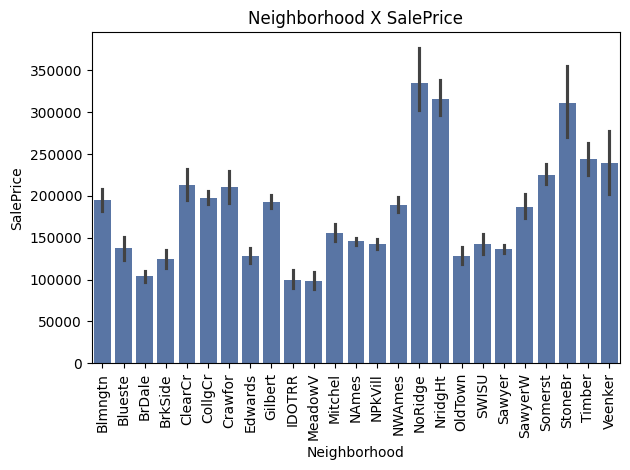

In [20]:
# plotagem de preco do imovel X o bairro dele
sns.barplot(data=df_casas_cat.sort_values('Neighborhood'), x='Neighborhood', y='SalePrice')
plt.xticks(rotation=90)
plt.title('Neighborhood X SalePrice')
plt.tight_layout()

In [21]:
# buscando visualizar melhor a diferença das categorias da variável Neighborhood, decidi plotar uma tabela com um esquema de cores
# como são muitas categorias, é difícil visualizar bem em boxplot
preco_bairro = df_casas_cat[['Neighborhood', 'SalePrice']].groupby('Neighborhood').describe().sort_values(('SalePrice', 'mean'), ascending=False)
preco_bairro = preco_bairro.style.background_gradient(cmap='Blues')
preco_bairro

Interessante, os bairros NoRidge, NridgHt e StoneBr têm seus preços bem acima da média dos outros bairros. Os preços desses bairros parecem flutuar bastante.

Enquanto a média de preços geral da base está em torno de 180 mil doláres, a média desses bairros está acima dos 300 mil.

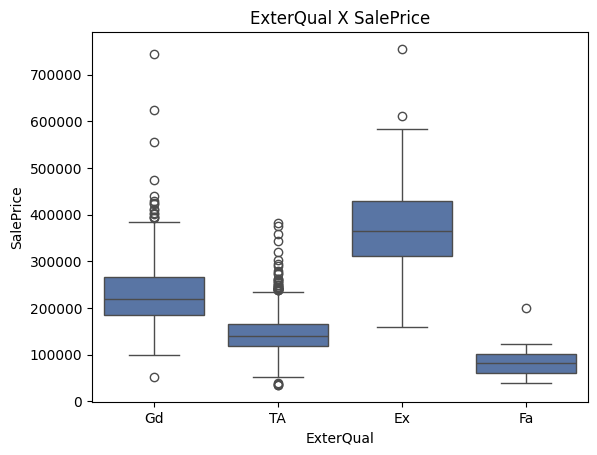

In [22]:
# verificando as categorias da variável ExterQual
# essa variável avalia a qualidade dos materiais externos do imóvel
sns.boxplot(data=df_casas_cat, x='ExterQual', y='SalePrice')
plt.title('ExterQual X SalePrice')
plt.show()

Aqui está uma legenda para o melhor entendimento das variáveis categóricas relacionadas a qualidade.


* Ex = Excellent
* Gd = Good
* TA = Average/Typical
* Fa = Fair
* Po = Poor

A qualidade dos materias externos parece ser um dos fatores determinantes para a precificação de um imóvel.

Essa variável apresenta indícios de estar fortemente correlacionada com a variável "SalePrice".

In [23]:
# quero visualizar a tabela para essa variável tambem
preco_exqual = df_casas_cat[['ExterQual', 'SalePrice']].groupby('ExterQual').describe().sort_values(('SalePrice', 'mean'), ascending=False)
preco_exqual = preco_exqual.style.background_gradient(cmap='Blues')
preco_exqual

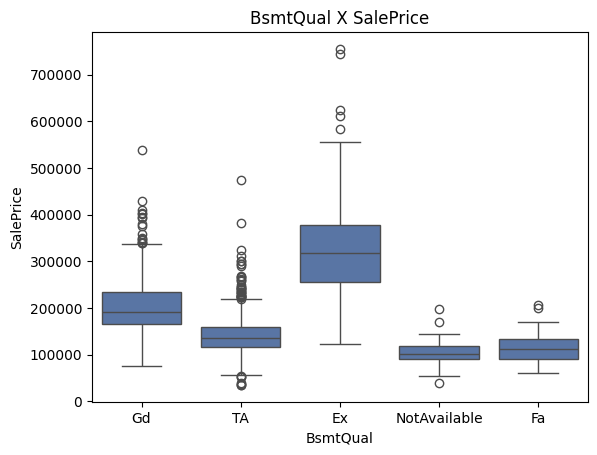

In [24]:
# verificando a relação da Qualidade do Porão com o Preço de Venda do imóvel
sns.boxplot(data=df_casas_cat, x='BsmtQual', y='SalePrice')
plt.title('BsmtQual X SalePrice')
plt.show()

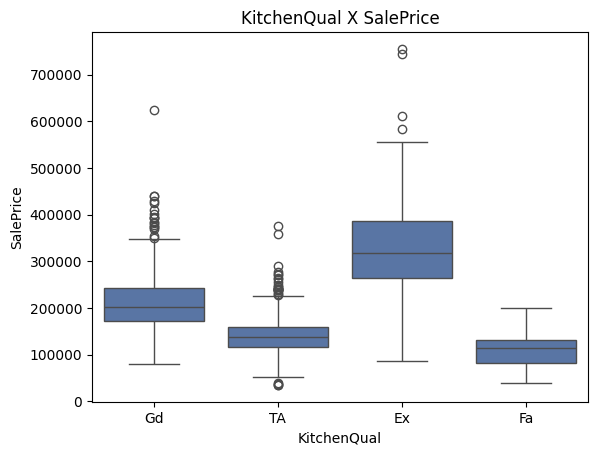

In [25]:
# verificando a relação da Qualidade da Cozinha X Valor de Vendo do imóvel
sns.boxplot(data=df_casas_cat, x='KitchenQual', y='SalePrice')
plt.title('KitchenQual X SalePrice')
plt.show()

Me parece as variáveis têm ExterQual,KitchenQual e BsmtQual médias de preço semelhantes.

Pode indicar que casas que tenham algum desses cômodos com qualidade excelente indica que a casa inteira seja de qualidade excelente.

Essa é uma conclusão perigosa e precisaria de mais estudo para averiguar, mas, os dados mostram que as casas com esses cômodos excelentes têm preços semelhantes.

In [26]:
# pode ser um pouco difícil de entender essa tabela cruzada
# mas nela, podemos ver que quando temos qualidade excelente em um desses pontos: cozinha, porão e parte externa do imóvel
# temos grandes chances dos outros dois pontos também terem qualidade externa. Esse pode ser um dos motivos das médias dessas variáveis serem semelhantes
pd.crosstab(df_casas_cat['BsmtQual'], [df_casas_cat['KitchenQual'], df_casas_cat['ExterQual']])

KitchenQual   Ex        Fa     Gd          TA            
ExterQual     Ex  Gd TA Fa  TA Ex   Gd  TA Ex Fa  Gd   TA
BsmtQual                                                 
Ex            39  22  0  0   0  5   44   3  0  0   1    7
Fa             0   0  2  1   3  0    0   2  0  1   1   25
Gd             2  21  2  0   4  0  341  65  2  1  15  164
NotAvailable   0   0  0  2   2  0    1   3  0  0   0   29
TA             1   4  7  5  22  3   22  96  0  4  16  469

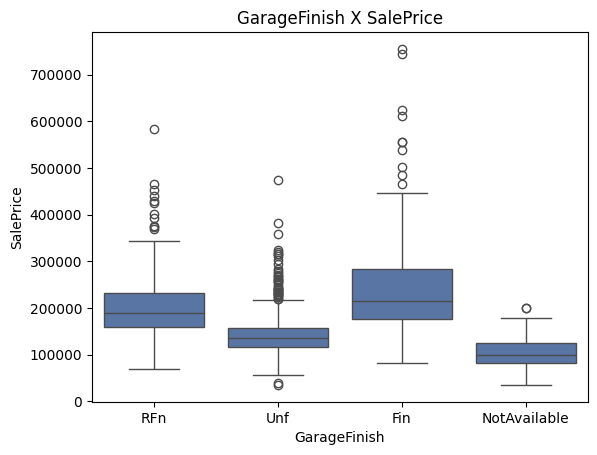

In [27]:
# quero averiguar agora o boxplot para a qualidade do acabamento interno das garagens
sns.boxplot(data=df_casas_cat, x='GarageFinish', y='SalePrice')
plt.title('GarageFinish X SalePrice')
plt.show()

Legenda:

* Fin = Finished
* RFn = Rough Finished
* Unf = Unfinished
* NA  = No Garage

É importante enteder que estamos falando de casas norte americanas, então, os valores e conceitos do que se olhar em um imóvel são diferentes dos daqui.

Segue uma descrição feita pelo chatgpt sobre oque cada categoria significa:

* Fin (Finished): Indica que a garagem tem um acabamento completo, provavelmente com paredes, piso e teto acabados com materiais como drywall, pintura e talvez até mesmo acabamentos mais sofisticados como painéis de madeira ou azulejos.

* RFn (Rough Finished): Indica que o acabamento interno da garagem está presente, mas não é tão refinado quanto o "Finished" (acabado). Pode haver algumas imperfeições ou materiais de qualidade inferior, mas o espaço é utilizável como uma garagem.

* Unf (Unfinished): Significa que a garagem não tem nenhum tipo de acabamento interno. Pode ser apenas uma estrutura de concreto com as paredes e o teto expostos, sem pintura ou outros materiais de acabamento.

* NA (No Garage): Indica que a propriedade não possui uma garagem.

Aqui percebemos que o tipo de acabamento da garagem tem uma média bem distantes dos outros exemplos analisados.